1. What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
   - Anomaly detection refers to the process of identifying data points, patterns, or observations that deviate significantly from the normal behavior of a dataset. It is widely used in areas such as fraud detection, network security, fault diagnosis, and system monitoring. Point anomalies represent individual data instances that stand out sharply from the rest of the data such as a sudden spike in credit card spending compared to a customer’s usual pattern. Contextual anomalies occur when an observation is considered normal in general but abnormal within a specific context or condition; for example, a temperature reading of 30°C is normal in summer but unusual during winter. Collective anomalies arise when a group of data points together form an abnormal pattern even though each point individually may appear normal such as a series of repeated login attempts over a short period indicating a potential cyberattack. These categories help in selecting the right detection method based on the nature of the data and the type of irregularity being investigated.

2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
   - Isolation Forest, DBSCAN, and Local Outlier Factor differ in how they identify anomalies and the types of datasets they work best with. Isolation Forest isolates data points by recursively splitting features, making anomalies easier to separate because they require fewer splits; this makes it efficient for high dimensional datasets and large scale anomaly detection tasks such as fraud detection or server log analysis. DBSCAN groups points based on density, treating points in low density regions as anomalies, which makes it highly effective for datasets with irregular cluster shapes; however, it struggles with high dimensional data. It is best suited for spatial data, geographic patterns, or clustering with noise. Local Outlier Factor measures how isolated a point is relative to its neighbors by comparing local density, allowing it to capture subtle anomalies that appear normal globally but deviate locally. This makes LOF useful for datasets where local patterns matter, such as sensor data, manufacturing quality control, or detecting unusual customer behavior within a similar peer group.


3. What are the key components of a Time Series? Explain each with one
example.
   - A time series is composed of several key components that together describe how data behaves over time. The trend represents the long term direction of the series such as a gradual increase in monthly online sales over several years due to growing customer demand. The seasonality component captures recurring patterns or cycles within fixed intervals, like higher electricity usage every summer because of increased air conditioning. Cyclic patterns reflect fluctuations that occur over irregular time periods, often influenced by economic or business cycles for example, stock market movements rising and falling based on broader financial conditions. The irregular or residual component includes random, unpredictable variations that cannot be explained by other components, such as a sudden drop in sales due to an unexpected event like a server outage. Together, these components help in understanding, analyzing, and forecasting time-dependent data.


4. Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
   - A time series is considered stationary when its statistical properties such as mean, variance, and autocorrelation remain constant over time. This means the behavior of the data does not depend on when you observe it, making stationary series more predictable and easier to model using techniques like ARIMA. To test for stationarity, common methods include visual inspection of plots to check for trends or seasonality, the Augmented Dickey Fuller (ADF) test which checks for the presence of a unit root, and the KPSS test which verifies whether the series deviates from stationarity. If a series is found to be non stationary, it can be transformed into a stationary one using techniques such as differencing, where consecutive values are subtracted to remove trends, log or power transformations to stabilize variance, and seasonal differencing to eliminate repeated seasonal patterns. These transformations help make the series stable and suitable for accurate forecasting.


5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
   - Autoregressive (AR) models predict future values using a linear combination of past observations, making them suitable when the current value is strongly dependent on its own history for example, predicting stock prices based on previous days’ prices. Moving Average (MA) models rely on past forecast errors rather than past values, capturing short term shock effects in a series, such as fluctuations in daily temperature caused by sudden weather changes. ARIMA combines both AR and MA components along with differencing to handle non stationary data, making it effective for general time dependent forecasting in domains like sales or production planning. SARIMA extends ARIMA by incorporating seasonal AR, MA, and differencing terms, making it ideal for datasets with strong seasonal cycles for instance, monthly airline passenger numbers that rise and fall in a predictable yearly pattern. SARIMAX further enhances SARIMA by adding exogenous (external) variables, allowing the model to consider outside influences such as advertising spend, holidays, or economic indicators. This makes SARIMAX useful when external factors significantly affect the forecasting target, such as predicting demand based on both historical sales and marketing activity.



     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


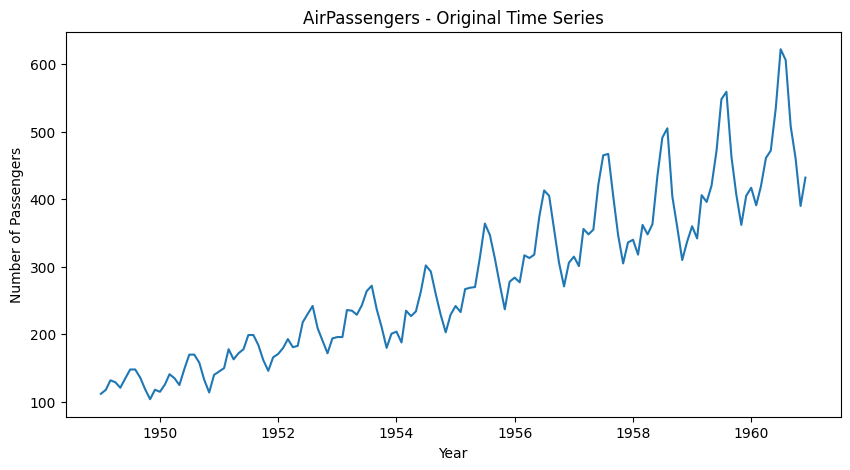

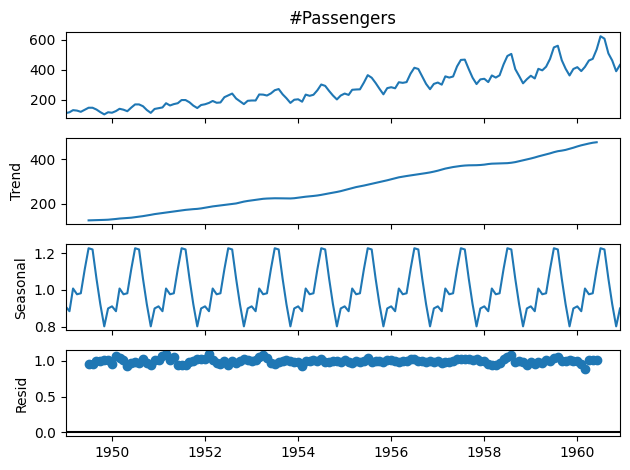

Trend Component:
Month
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
                 ...    
1960-02-01    461.375000
1960-03-01    465.208333
1960-04-01    469.333333
1960-05-01    472.750000
1960-06-01    475.041667
Name: trend, Length: 132, dtype: float64

Seasonality Component:
Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
Name: seasonal, dtype: float64

Residual Component:
Month
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
                ...   
1960-02-01    0.959079
1960-03-01    0.894086
1960-04-01    1.006495
1960-05-01    1.017359
1960-06-01    1.012079
Name: resid, Length: 132, dtype: float64


In [1]:
# 6. Dataset:● NYC Taxi Fare Data ● AirPassengers Dataset
#   Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


df = pd.read_csv("AirPassengers.csv")

print(df.head())

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Rename passengers column if needed
if 'Passengers' in df.columns:
    df_ts = df['Passengers']
else:
    df_ts = df.iloc[:, 0]   # first numeric column

plt.figure(figsize=(10,5))
plt.plot(df_ts)
plt.title("AirPassengers - Original Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

result = seasonal_decompose(df_ts, model='multiplicative')

# Plot decomposition results
result.plot()
plt.show()

# Print components if needed
print("Trend Component:")
print(result.trend.dropna())

print("\nSeasonality Component:")
print(result.seasonal.head())

print("\nResidual Component:")
print(result.resid.dropna())


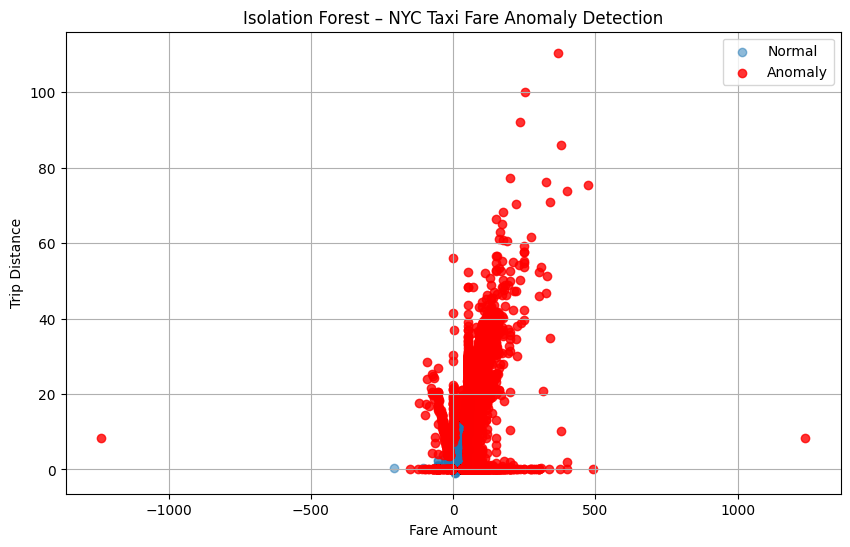

Total records: 533002
Normal points: 517020
Anomalies detected: 15982


In [5]:
# 7.  Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
# detect anomalies. Visualize the anomalies on a 2D scatter plot.
# (Include your Python code and output in the code box below.)


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


df = pd.read_csv("NYC_taxi_fare_data.csv")

# Select 2 numerical features for visualization
data = df[["fare_amount", "trip_distance"]].dropna()


iso = IsolationForest(
    contamination=0.03,  # % of anomalies
    random_state=42
)

# Fit and predict
data["anomaly"] = iso.fit_predict(data)

# anomaly = -1 (outlier), 1 = inlier
outliers = data[data["anomaly"] == -1]
inliers  = data[data["anomaly"] ==  1]

plt.figure(figsize=(10,6))

# Normal points
plt.scatter(inliers["fare_amount"], inliers["trip_distance"],
            label="Normal", alpha=0.5)

# Anomalies
plt.scatter(outliers["fare_amount"], outliers["trip_distance"],
            color="red", label="Anomaly", alpha=0.8)

plt.title("Isolation Forest – NYC Taxi Fare Anomaly Detection")
plt.xlabel("Fare Amount")
plt.ylabel("Trip Distance")
plt.legend()
plt.grid(True)
plt.show()


print("Total records:", len(data))
print("Normal points:", len(inliers))
print("Anomalies detected:", len(outliers))


     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


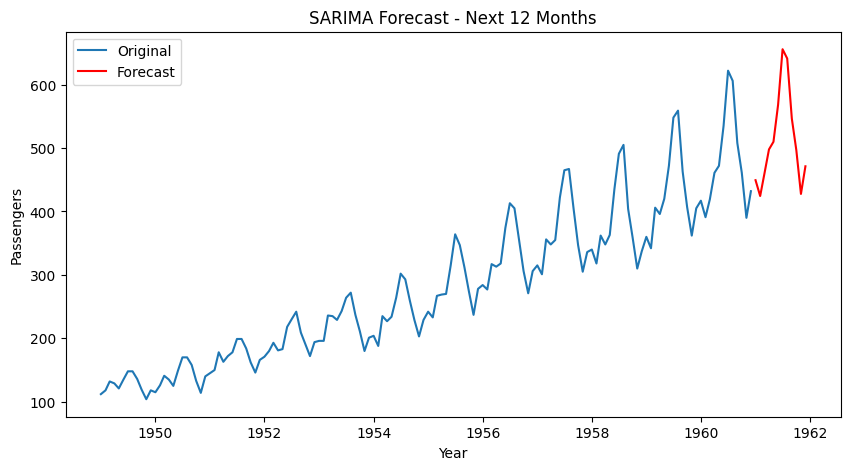

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Sat, 29 Nov 2025   AIC                           1022.299
Time:                                    09:57:00   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

In [8]:
# 8. Train a SARIMA model on the monthly airline passengers dataset.
# Forecast the next 12 months and visualize the results.


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the uploaded CSV file
df = pd.read_csv("AirPassengers.csv")

# Check the structure of the dataset
print(df.head())

# Remove leading spaces from columns
df.columns = df.columns.str.strip()

# Rename the '#Passengers' column to 'Passengers'
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

# Convert 'Month' to datetime and set it as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Define the SARIMA model
model = SARIMAX(df['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
fit_model = model.fit(disp=False)

forecast = fit_model.forecast(12)

plt.figure(figsize=(10,5))
plt.plot(df['Passengers'], label="Original")
plt.plot(forecast, label="Forecast", color='red')
plt.title("SARIMA Forecast - Next 12 Months")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

print(fit_model.summary())

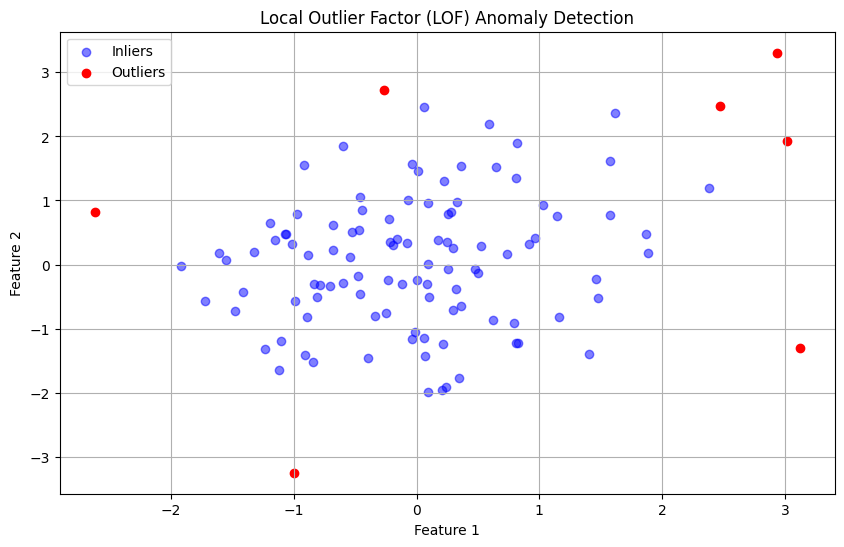

Number of outliers detected: 7
Number of inliers detected: 103


In [9]:
# 9.  Apply Local Outlier Factor (LOF) on any numerical dataset to detect
# anomalies and visualize them using matplotlib.
# (Include your Python code and output in the code box below.)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


# Generate a dataset of random points (100 normal, 10 outliers)
np.random.seed(42)
X_inliers = np.random.randn(100, 2)  # 100 inlier points
X_outliers = np.random.uniform(low=-4, high=4, size=(10, 2))  # 10 outlier points

# Combine the data
X = np.concatenate([X_inliers, X_outliers], axis=0)

lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)

# LOF labels: -1 = outliers, 1 = inliers
outliers = X[y_pred == -1]
inliers = X[y_pred == 1]


plt.figure(figsize=(10, 6))

# Plot the inliers
plt.scatter(inliers[:, 0], inliers[:, 1], label="Inliers", color='blue', alpha=0.5)

# Plot the outliers
plt.scatter(outliers[:, 0], outliers[:, 1], label="Outliers", color='red', alpha=1.0)

# Title and labels
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

print("Number of outliers detected:", len(outliers))
print("Number of inliers detected:", len(inliers))


10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time? ● How would this solution help business decisions or operations?

      - In a power grid monitoring company, the primary goal is to forecast energy demand and detect anomalies in real-time consumption data. To detect anomalies, techniques like Isolation Forest, Local Outlier Factor (LOF), and DBSCAN can be applied, with LOF being particularly effective in identifying outliers in fluctuating energy data. For short-term forecasting, SARIMAX is ideal as it can capture both seasonality and include external factors like weather, which significantly affect energy usage. Model validation and performance monitoring are crucial, using metrics like MAE and RMSE for forecasting accuracy, and precision and recall for anomaly detection. Continuous monitoring and periodic retraining ensure the models stay effective over time. This solution helps the business by optimizing resource allocation, preventing overloads, detecting inefficiencies, and improving customer service, ultimately leading to better operational efficiency and cost savings.

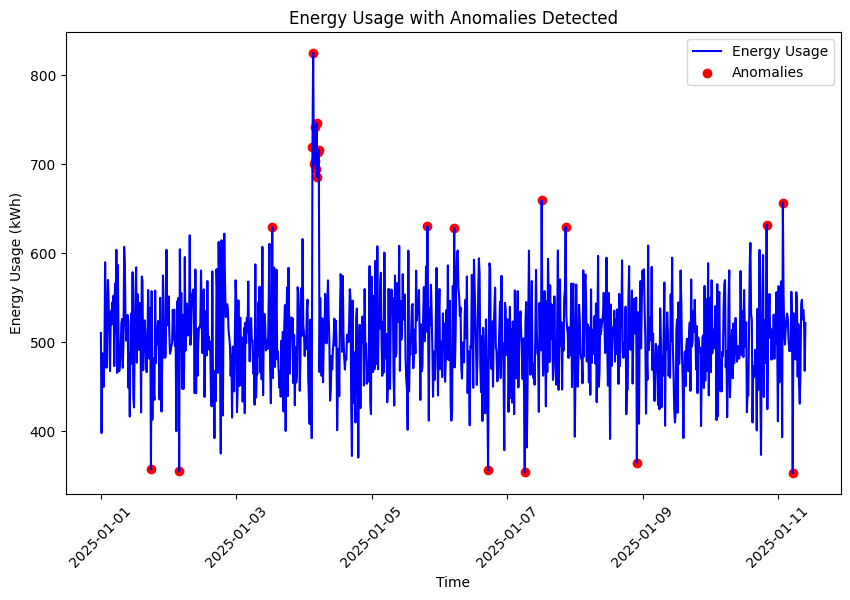

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Simulate a sample streaming dataset
timestamps = pd.date_range("2025-01-01", periods=1000, freq="15min")
regions = np.random.choice(['North', 'South', 'East', 'West'], size=1000)
weather_conditions = np.random.choice(['Clear', 'Rainy', 'Cloudy', 'Stormy'], size=1000)
energy_usage = np.random.normal(loc=500, scale=50, size=1000)  # Simulate energy usage in kWh
energy_usage[300:310] = energy_usage[300:310] + 200  # Add artificial spike

# Create a dataframe
df = pd.DataFrame({
    'timestamp': timestamps,
    'region': regions,
    'weather_conditions': weather_conditions,
    'energy_usage': energy_usage
})

# Use Local Outlier Factor (LOF) for anomaly detection
lof = LocalOutlierFactor(n_neighbors=20)
df['anomaly'] = lof.fit_predict(df[['energy_usage']])

# Plot the results (normal vs. anomalies)
plt.figure(figsize=(10,6))
plt.plot(df['timestamp'], df['energy_usage'], label='Energy Usage', color='blue')
plt.scatter(df['timestamp'][df['anomaly'] == -1], df['energy_usage'][df['anomaly'] == -1], color='red', label='Anomalies')
plt.title('Energy Usage with Anomalies Detected')
plt.xlabel('Time')
plt.ylabel('Energy Usage (kWh)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

